# Data Exploration 

In [33]:
%config IPCompleter.greedy=True
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [5]:
def load_dataset(): # Loads the saved numpy object and returns them as tuple
    
    npzfile = np.load("imageX_Axis.npz",allow_pickle=True)
    x_axis = npzfile['arr_0'] # x - axis
    
    npzfile = np.load("imageY_Axis.npz",allow_pickle=True)
    y_axis = npzfile['arr_0'] # y - axis
    
    return (x_axis,y_axis)

In [6]:
imageX_Axis,imageY_Axis= load_dataset()
print(f"X-axis Length : {len(imageX_Axis)}")
print(f"Y-axis Length : {len(imageY_Axis)}")

X-axis Length : 2431
Y-axis Length : 2431


True Label : 0


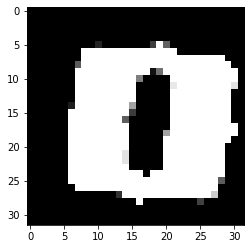

In [7]:
imIndex=4
testImg = imageX_Axis[imIndex]
testImg_Label = imageY_Axis[imIndex]
testImg = testImg.reshape(32,32)
plt.imshow(testImg,cmap="gray")
print(f"True Label : {testImg_Label}")

In [8]:
datasetDf = pd.DataFrame(imageX_Axis,imageY_Axis)

In [9]:
datasetDf.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0,0,0,0,0,0,0,0,0,0,...,255,255,255,255,255,255,255,255,255,255
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
datasetDf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2431 entries, 0 to 1
Columns: 1024 entries, 0 to 1023
dtypes: uint8(1024)
memory usage: 2.4+ MB


In [11]:
len(datasetDf)

2431

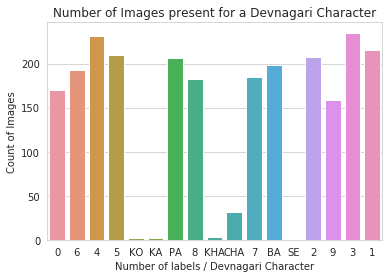

In [12]:
sns.set_style("whitegrid")
sns.countplot(x=datasetDf.index,linewidth=1,)
plt.title('Number of Images present for a Devnagari Character')
plt.xlabel('Number of labels / Devnagari Character')
plt.ylabel('Count of Images')
plt.show()

In [13]:
datasetDf['label'] = datasetDf.index

In [14]:
datasetDf.head()

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,label
0,0,0,0,0,0,0,0,0,0,0,...,255,255,255,255,255,255,255,255,255,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


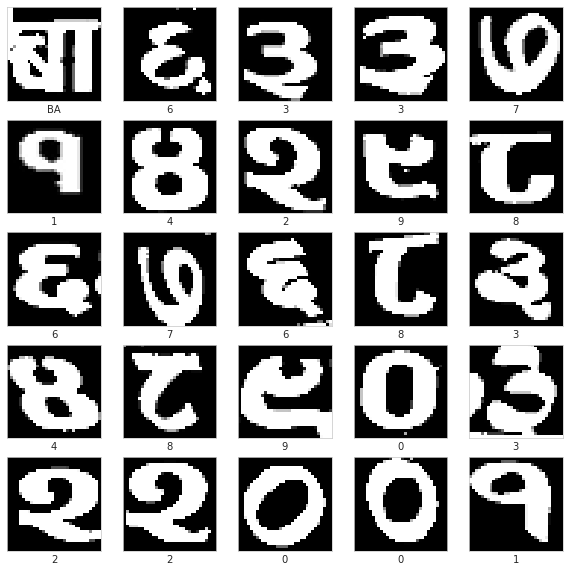

In [15]:
"""let's plot 25 random train set images """
plt.figure(figsize=(10,10))
rand = np.random.randint(1,len(datasetDf),25) #returns a array of random no. from 1 to 1000
# print(rand)
for i in range(len(rand)):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    imgToShow = np.array(datasetDf.iloc[rand[i]])
    plt.xlabel(imgToShow[-1])
    imgToShow = imgToShow[:-1].reshape(32,32)
    plt.imshow(np.int16(imgToShow),cmap=plt.cm.gray)
#     plt.xlabel()


### Looking At images where black pixels are representing the character

In [16]:
#this dataframe may have such images 
# checking 1st pixel of image ...if has white background it has value 255
corner1_blackLetter = datasetDf.loc[datasetDf[0]==255]
corner2_blackLetter = datasetDf.loc[datasetDf[31]==255]
corner3_blackLetter = datasetDf.loc[datasetDf[992]==255]
corner4_blackLetter = datasetDf.loc[datasetDf[1023]==255]
corner_white_pixel1 = pd.merge(corner1_blackLetter,corner2_blackLetter,how="inner")
corner_white_pixel2 = pd.merge(corner3_blackLetter,corner4_blackLetter,how="inner")
corner_white_pixel = pd.merge(corner_white_pixel1,corner_white_pixel2,how="inner")
corner_white_pixel.head()

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,label
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,0
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,0
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,0
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,0
4,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,254,255,255,255,255,6


[16 18 24 27 11 11 25 27  8  1 19 29 33 14 26 29 19 21 23 23 18  6 32 22
 15]


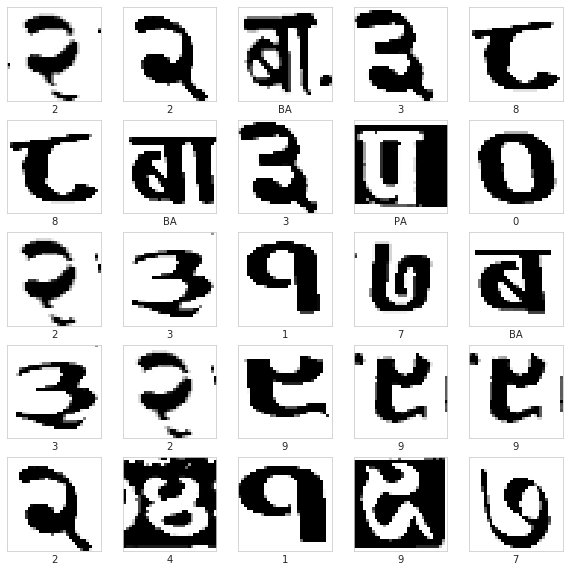

In [17]:
"""let's plot 25 random train set images """
plt.figure(figsize=(10,10))
rand = np.random.randint(1,37,25) #returns a array of random no. from 1 to 1000
# print(rand)
for i in range(len(rand)):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    
    imgToShow = np.array(corner_white_pixel.iloc[rand[i]]) # a row from the 
    plt.xlabel(imgToShow[-1])

    imgToShow = imgToShow[:-1].reshape(32,32)
    plt.imshow(np.int16(imgToShow),cmap='gray')
#     plt.xlabel()


In [36]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
# from keras
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


Using TensorFlow backend.


In [18]:
workingLabel = ["0","1","2","3","4","5","6","7","8","9","PA","BA"]

In [19]:
workingDataset = datasetDf.loc[datasetDf['label'].isin(workingLabel)]

In [20]:
workingDataset.head()

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,label
0,0,0,0,0,0,0,0,0,0,0,...,255,255,255,255,255,255,255,255,255,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
workingDataset.label.value_counts()

3     235
4     231
1     215
5     210
2     207
PA    206
BA    198
6     193
7     185
8     183
0     170
9     159
Name: label, dtype: int64

In [32]:
labels = workingDataset.label
labels.head()

0    0
0    0
0    0
0    0
0    0
Name: label, dtype: object

In [31]:
charactersLP = workingDataset.iloc[:,range(0,1024)]
charactersLP.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0,0,0,0,0,0,0,0,0,0,...,255,255,255,255,255,255,255,255,255,255
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
items= len(charactersLP)
char_images= np.zeros((items,32,32))
# 
char_images.shape[0]
char_images.shape

for index,image in enumerate(charactersLP.itertuples()):
#     print(image[1:])
    
    firstimage =  np.array(charactersLP[1:],dtype=float)
#     print(firstimage.shape)
    firstimage =  np.resize(firstimage,(32,32))/255
#     print(firstimage.shape)

    char_images[index]=firstimage
#     print(firstimage.shape)


In [52]:
char_images.shape

(2392, 32, 32)

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(char_images, labels, test_size = 0.4, random_state=42)

# Encoding Y train

In [54]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(Y_train)
onehot_encoder = OneHotEncoder(sparse=False,categories='auto')
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [55]:
len(onehot_encoded[4])

12

# Encoding Y test

In [44]:
# data = ['cold', 'cold', 'warm', 'cold', 'hot', 'hot', 'warm', 'cold', 'warm', 'hot']
label_encoderYt = LabelEncoder()
integer_encodedYt = label_encoderYt.fit_transform(Y_test)
onehot_encoderYt = OneHotEncoder(sparse=False,categories='auto')
integer_encodedYt = integer_encodedYt.reshape(len(integer_encodedYt), 1)
onehot_encodedYt = onehot_encoderYt.fit_transform(integer_encodedYt)


In [ ]:
#row vector for inputs

trainX =X_train.reshape((-1,1024))

testX= X_test.reshape((-1,1024))


In [57]:

model = Sequential([
    Dense(128, activation='relu', input_shape=(1024,)),
    Dense(128, activation='relu'),
    Dense(12, activation='softmax'),
])

# Compile the model.

model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)



In [ ]:
# Train the model.
model.fit(
  trainX,
  onehot_encoded,
  epochs=5,
  batch_size=32,
)

In [ ]:
# model Evaluation
model.evaluate(testX,onehot_encodedY)